In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error,make_scorer
from scipy.stats import skew
from IPython.display import display

In [41]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)
%matplotlib inline

In [42]:
train=pd.read_csv('/Users/yanglulu/Desktop/Kaggle Housing Price/train.csv')
print('train: '+str(train.shape))

train: (1460, 81)


In [43]:
idsUnique = len(set(train['Id']))
idsTotal=len(train['Id'])
idsDuplicate=idsTotal-idsUnique
print('There are ' + str(idsDuplicate) + ' duplicate IDs for ' + str(idsTotal) + ' total entries')

There are 0 duplicate IDs for 1460 total entries


In [44]:
train.drop('Id',axis=1,inplace=True)

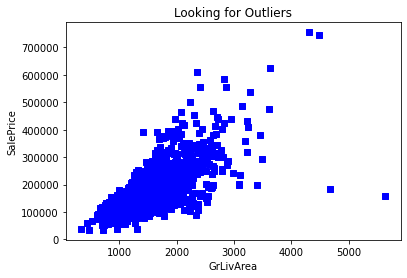

In [45]:
plt.scatter(train['GrLivArea'],train['SalePrice'],c='blue',marker = 's')
plt.title('Looking for Outliers')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [46]:
train=train[train['GrLivArea']<4000]

In [47]:
train.SalePrice=np.log1p(train.SalePrice)
y=train.SalePrice

In [50]:
train.loc[:,'Alley'] =train.loc[:,'Alley'].fillna('None')
train.loc[:,'BedroomAbvGr']=train.loc[:,'BedroomAbvGr'].fillna(0)
train.loc[:,'BsmtQual']=train.loc[:,'BsmtQual'].fillna('No')
train.loc[:,'BsmtCond']=train.loc[:,'BsmtCond'].fillna('No')
train.loc[:,'BsmtExposure']=train.loc[:,'BsmtExposure'].fillna('No')
train.loc[:,'BsmtFinType1']=train.loc[:,'BsmtFinType1'].fillna('No')
train.loc[:,'BsmtFinType2']=train.loc[:,'BsmtFinType2'].fillna('No')
train.loc[:,'BsmtFullBath']=train.loc[:,'BsmtFullBath'].fillna(0)
train.loc[:,'BsmtHalfBath']=train.loc[:,'BsmtHalfBath'].fillna(0)
train.loc[:,'BsmtUnfSF']=train.loc[:,'BsmtUnfSF'].fillna(0)
train.loc[:,'CentralAir']=train.loc[:,'CentralAir'].fillna('No')
train.loc[:,'Condition1']=train.loc[:,'Condition1'].fillna('Norm')
train.loc[:,'Condition2']=train.loc[:,'Condition2'].fillna('Norm')
train.loc[:,'EnclosedPorch']=train.loc[:,'EnclosedPorch'].fillna(0)
train.loc[:,'ExterCond']=train.loc[:,'ExterCond'].fillna('TA')
train.loc[:,'ExterQual']=train.loc[:,'ExterQual'].fillna('TA')
train.loc[:,'Fence']=train.loc[:,'Fence'].fillna('No')
train.loc[:,'FireplaceQu']=train.loc[:,'FireplaceQu'].fillna('No')
train.loc[:,'Fireplaces']=train.loc[:,'Fireplaces'].fillna(0)
train.loc[:,'Functional']=train.loc[:,'Functional'].fillna('Typ')
train.loc[:,'GarageType']=train.loc[:,'GarageType'].fillna('No')
train.loc[:,'GarageCond']=train.loc[:,'GarageCond'].fillna('No')
train.loc[:,'GarageFinish']=train.loc[:,'GarageFinish'].fillna('No')
train.loc[:,'GarageQual']=train.loc[:,'GarageQual'].fillna('No')
train.loc[:,'GarageType']=train.loc[:,'GarageType'].fillna('No')
train.loc[:,'GarageArea']=train.loc[:,'GarageArea'].fillna(0)
train.loc[:,'GarageCars']=train.loc[:,'GarageCars'].fillna(0)
train.loc[:,'HalfBath']=train.loc[:,'HalfBath'].fillna(0)
train.loc[:,'HeatingQC']=train.loc[:,'HeatingQC'].fillna('TA')
train.loc[:,'KitchenAbvGr']=train.loc[:,'KitchenAbvGr'].fillna(0)
train.loc[:,'KitchenQual']=train.loc[:,'KitchenQual'].fillna('TA')
train.loc[:,'LotFrontage']=train.loc[:,'LotFrontage'].fillna(0)
train.loc[:,'LotShape']=train.loc[:,'LotShape'].fillna('Reg')
train.loc[:,'MasVnrType']=train.loc[:,'MasVnrType'].fillna('None')
train.loc[:,'MasVnrArea']=train.loc[:,'MasVnrArea'].fillna(0)
train.loc[:,'MiscFeature']=train.loc[:,'MiscFeature'].fillna('None')
train.loc[:,'MiscVal']=train.loc[:,'MiscVal'].fillna(0)
train.loc[:,'OpenPorchSF']=train.loc[:,'OpenPorchSF'].fillna(0)
train.loc[:,'PavedDrive']=train.loc[:,'PavedDrive'].fillna('N')
train.loc[:,'PoolQC']=train.loc[:,'PoolQC'].fillna('No')
train.loc[:,'PoolArea']=train.loc[:,'PoolArea'].fillna(0)
train.loc[:,'SaleCondition']=train.loc[:,'SaleCondition'].fillna('Normal')
train.loc[:,'ScreenPorch']=train.loc[:,'ScreenPorch'].fillna(0)
train.loc[:,'TotRmsAbvGrd']=train.loc[:,'TotRmsAbvGrd'].fillna(0)
train.loc[:,'Utilities']=train.loc[:,'Utilities'].fillna('AllPub')
train.loc[:,'WoodDeckSF']=train.loc[:,'WoodDeckSF'].fillna(0)

In [51]:
train=train.replace({'MSSubClass':{20:'SC20',30:'SC30',40:'SC40',45:'SC45',50:'SC50',60:'SC60',70:'SC70',75:'SC75',80:'SC80',85:'SC85',90:'SC90',120:'SC120',150:'SC150',160:'SC160',180:'SC180',190:'SC190'}},
                     {'MoSold':{1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}})
                

In [52]:
train=train.replace({'Alley':{'Grvl':1,'Pave':2},
                    'BsmtCond':{'No':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                    'BsmtExposure':{'No':0,'Mn':1,'Av':2,'Gd':3},
                    'BsmtFinType1':{'No':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
                    'BsmtFinType2':{'No':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
                    'BsmtQual':{'No':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                    'ExterCond':{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                    'ExterQual':{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                    'FirePlaceQu':{'No':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                    'Functional':{'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,'Mod':5,'Min2':6,'Min1':7,'Typ':8},
                    'GarageCond':{'No':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                    'GarageQual':{'No':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                    'HeatingQC':{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                    'KitchenQual':{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                    'LandSlope':{'Sev':1,'Mod':2,'Gtl':3},
                    'LotShape':{'IR3':1,'IR2':2,'IR1':3,'Reg':4},
                    'PavedDrive':{'N':0,'P':1,'Y':2},
                    'PoolQC':{'No':0, 'Fa':1,'TA':2,'Gd':3,'Ex':4},
                    'Street':{'Grvl':1,'Pave':2},
                    'Utilities':{'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4}})

In [53]:
train['SimplOverallQual']=train.OverallQual.replace({1:1,2:1,3:1,
                                                     4:2,5:2,6:2,
                                                     7:3,8:3,9:3,10:3})
train["SimplOverallCond"] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplPoolQC"] = train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
train["SimplGarageCond"] = train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplGarageQual"] = train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplFunctional"] = train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
train["SimplKitchenQual"] = train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplHeatingQC"] = train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplBsmtFinType1"] = train.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtFinType2"] = train.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtCond"] = train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplBsmtQual"] = train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplExterCond"] = train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplExterQual"] = train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

In [54]:
train['OverallGrade']=train['OverallCond']*train['OverallQual']
train['GarageGrade']=train['GarageCond']*train['GarageQual']
train['ExterGrade']=train['ExterCond']*train['ExterQual']
train['KitchenScore']=train['KitchenAbvGr']*train['KitchenQual']
train['FireplaceScore']=train['Fireplaces']*train['FireplaceQu']
train['GarageScore']=train['GarageArea']*train['GarageQual']
train['PoolScore']=train['PoolArea']*train['PoolQC']
train['SimplOverallGrade']=train['SimplOverallCond']*train['SimplOverallQual']
train["SimplExterGrade"] = train["SimplExterQual"] * train["SimplExterCond"]
train["SimplPoolScore"] = train["PoolArea"] * train["SimplPoolQC"]
train["SimplGarageScore"] = train["GarageArea"] * train["SimplGarageQual"]
train["SimplFireplaceScore"] = train["Fireplaces"] * train["SimplFireplaceQu"]
train["SimplKitchenScore"] = train["KitchenAbvGr"] * train["SimplKitchenQual"]
train['TotalBath']=train['BsmtFullBath']+(0.5*train['BsmtHalfBath'])+train['FullBath']+(0.5*train['HalfBath'])
train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]
train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + train["3SsnPorch"] + train["ScreenPorch"]
train['HasMasVnr']=train.MasVnrType.replace({'BrkCmn':1,'BrkFace':1,'CBlock':1,'Stone':1,'None':0})
train['BoughtOffPlan']=train.SaleCondition.replace({'Abnorml':0,'Alloca':0,'AdjLand':0,'Family':0,'Normal':0,'Partial':1})

In [56]:
#print(train['GarageCond'])
print("Find most important features relative to target")
corr=train.corr()
corr.sort_values(['SalePrice'],ascending=False,inplace=True)
print(corr['SalePrice'])

Find most important features relative to target
SalePrice         1.000
OverallQual       0.819
AllSF             0.817
AllFlrsSF         0.729
GrLivArea         0.719
                  ...  
SimplExterCond   -0.042
MSSubClass       -0.075
KitchenAbvGr     -0.148
EnclosedPorch    -0.149
LotShape         -0.286
Name: SalePrice, Length: 86, dtype: float64


In [57]:
train['OverallQual-s2']=train['OverallQual']**2
train['OverallQual-s3']=train['OverallQual']**3
train['OverallQual-Sq']=np.sqrt(train['OverallQual'])
train['AllSF-2']=train['AllSF']**2
train['AllSF-3']=train['AllSF']**3
train['AllSF-Sq']=np.sqrt(train['AllSF'])
train["AllFlrsSF-2"] = train["AllFlrsSF"] ** 2
train["AllFlrsSF-3"] = train["AllFlrsSF"] ** 3
train["AllFlrsSF-Sq"] = np.sqrt(train["AllFlrsSF"])
train["GrLivArea-2"] = train["GrLivArea"] ** 2
train["GrLivArea-3"] = train["GrLivArea"] ** 3
train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])
train["SimplOverallQual-s2"] = train["SimplOverallQual"] ** 2
train["SimplOverallQual-s3"] = train["SimplOverallQual"] ** 3
train["SimplOverallQual-Sq"] = np.sqrt(train["SimplOverallQual"])
train["ExterQual-2"] = train["ExterQual"] ** 2
train["ExterQual-3"] = train["ExterQual"] ** 3
train["ExterQual-Sq"] = np.sqrt(train["ExterQual"])
train["GarageCars-2"] = train["GarageCars"] ** 2
train["GarageCars-3"] = train["GarageCars"] ** 3
train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])
train["TotalBath-2"] = train["TotalBath"] ** 2
train["TotalBath-3"] = train["TotalBath"] ** 3
train["TotalBath-Sq"] = np.sqrt(train["TotalBath"])
train["KitchenQual-2"] = train["KitchenQual"] ** 2
train["KitchenQual-3"] = train["KitchenQual"] ** 3
train["KitchenQual-Sq"] = np.sqrt(train["KitchenQual"])
train["GarageScore-2"] = train["GarageScore"] ** 2
train["GarageScore-3"] = train["GarageScore"] ** 3
train["GarageScore-Sq"] = np.sqrt(train["GarageScore"])